In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import collections
import itertools as it

In [2]:
def separation(data):
    '''Function for separation of certain data in the dataset.
       Function takes in a string and returns a
       list of elements of the string'''
    if '/' in data:
        data = data.split('/')
    return data

def coma_separation(data):
    '''Function for separation of certain data in the dataset.
       Function takes in a string and returns a
       list of elements of the string'''
    data = str(data)
    if ',' in data:
        data = data.split(', ')
    return data

In [3]:
data = pd.read_csv('Sexuality_in_video_games_unedited.csv')

In [4]:
data

,Timestamp,Your Gender,Your Sexual Orientation,Your age,What country are You from?,How often do You play computer games,And for how long do Your gaming sessions usually last,Your favourite video game genre,Your favourite game(May write several),What other interests do You hold(You can choose multiple and write any others in Other),Your overall view on seeing sexual themes in the game(What is you reaction on seeing sexual themes in a game),Your view on sexualisation of the character design(Your reaction on seeing (overly)sexual character design),Any specific things that you usually LIKE in character designs,Any specific things that you usually DISLIKE in character designs,Your view on sexual sub-context in video games- themes around sex and similar,"If you dislike the (over)use of sexual sub-content, would you be okay if it's explained logically, tied to the story(And-Or if it exists for more reasons than just for marketing and-or similar)",Are you okay with LGBT+ characters in video games,Anything to add to the theme? Your personal thoughts.
0,04/01/2021 18:22:52,Prefer not to say,confused,27-35,Latvia,Every day,5-8 hours,Multiplayer RPGs,"WoW, Lol, Tekken","Books(Non asian), Tabletop games(just the basi...",Sometimes positive,4,NaN,Oversized breasts,3,Yes,"Yes, but only if explained logically and-or ex...",NaN
1,04/01/2021 18:43:27,Male,Heterosexual,21-26,Russia,Several times a week,0-4 hours,Immersive Sims,"Deus Ex: Human Revolution, Prey (2017), Mass E...","Books(Non asian), Films and TV series",Sometimes positive,4,When it makes sense in a given setting,When there is no sense or the explanation is w...,4,Yes,"Yes, but only if explained logically and-or ex...",There are moments when erotic scenes are just ...
2,04/01/2021 18:43:43,Male,Heterosexual,21-26,Russia,Several times a week,0-4 hours,Singleplayer RPGs,Red Dead Redemption 2,"Books(Non asian), Films and TV series, Manga",Mostly positive,7,NaN,NaN,5,Yes,"Yes, but only if explained logically and-or ex...",NaN
3,04/01/2021 18:52:43,Male,Heterosexual,27-35,Russian Federation,Every day,5-8 hours,Don't have favorite,"Ace Combat 7, SpecOps The Line, Deus Ex Human ...","Books(Non asian), Tabletop RPGs(D&D and simila...",Neutral,4,marks of their mind characteristics,"Extreme sexualisation, too bright colors, hype...",4,Yes,Maybe/Neutral,NaN
4,04/01/2021 19:04:46,Male,Heterosexual,21-26,Latvia,Ranges from every day to several times a week.,5-8 hours,Action,Devil May Cry; Dark Souls; Tekken; Escape From...,"Tabletop games(just the basic ones), Films and...",Sometimes positive,4,When the design of the character serves to tel...,Dislike when the creative process of designing...,4,Yes,If that type of content feels forced on then n...,As the LGBT+ community has gained more tractio...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,05/01/2021 11:37:11,Male,Heterosexual,21-26,US,Several times a week,0-4 hours,Multiplayer RPGs,"Halo, need for speed: underground, overwatch","Books(Non asian), Films and TV series, Anime",Sometimes negative,3,NaN,NaN,4,Yes,"Yes, in any way they appear there",NaN
243,05/01/2021 11:37:39,Male,Heterosexual,More than 35,Germany,Several times a week,0-4 hours,Action,"Celeste, Doom, Super Mario Galaxy, Firewatch, ...","Books(Non asian), Tabletop games(just the basi...",Neutral,2,I like pretty faces and generally attractive (...,"exaggerated boobs, unrealisticly skimpy outfit...",5,"Maybe, but if it's nonsense like Quiet's outfi...","Yes, in any way they appear there","I like playing games with attractive people, b..."
244,05/01/2021 11:43:50,Female,Heterosexual,27-35,USA,Several times a week,0-4 hours,Singleplayer RPGs,Skyrim,"Books(Non asian), Films and TV series",Neutral,2,NaN,"Sexualized female characters, non sexualized m...",4,It is too overdone to be ok with context,"Yes, in any way they appear there",NaN
245,05/01/2021 11:45:41,Male,Heterosexual,Younger than 16,NaN,Several times a week,0-4 hours,Simulators,"Democracy 4, Ci

In [5]:
data.columns = ['date', 'Gender', 'Sexual_orientation', 
                'Age_group','Country','Regularity_of_gaming',
                'Session_length','Genre', 'Favourite_game','Other_interests',
               'View_on_sexuality','View_on_sexualisation','Design_preferences',
               'Design_issues','View_on_sexual_sub_context','bruh','LGBT_representation', 'extras']
data

,date,Gender,Sexual_orientation,Age_group,Country,Regularity_of_gaming,Session_length,Genre,Favourite_game,Other_interests,View_on_sexuality,View_on_sexualisation,Design_preferences,Design_issues,View_on_sexual_sub_context,bruh,LGBT_representation,extras
0,04/01/2021 18:22:52,Prefer not to say,confused,27-35,Latvia,Every day,5-8 hours,Multiplayer RPGs,"WoW, Lol, Tekken","Books(Non asian), Tabletop games(just the basi...",Sometimes positive,4,NaN,Oversized breasts,3,Yes,"Yes, but only if explained logically and-or ex...",NaN
1,04/01/2021 18:43:27,Male,Heterosexual,21-26,Russia,Several times a week,0-4 hours,Immersive Sims,"Deus Ex: Human Revolution, Prey (2017), Mass E...","Books(Non asian), Films and TV series",Sometimes positive,4,When it makes sense in a given setting,When there is no sense or the explanation is w...,4,Yes,"Yes, but only if explained logically and-or ex...",There are moments when erotic scenes are just ...
2,04/01/2021 18:43:43,Male,Heterosexual,21-26,Russia,Several times a week,0-4 hours,Singleplayer RPGs,Red Dead Redemption 2,"Books(Non asian), Films and TV series, Manga",Mostly positive,7,NaN,NaN,5,Yes,"Yes, but only if explained logically and-or ex...",NaN
3,04/01/2021 18:52:43,Male,Heterosexual,27-35,Russian Federation,Every day,5-8 hours,Don't have favorite,"Ace Combat 7, SpecOps The Line, Deus Ex Human ...","Books(Non asian), Tabletop RPGs(D&D and simila...",Neutral,4,marks of their mind characteristics,"Extreme sexualisation, too bright colors, hype...",4,Yes,Maybe/Neutral,NaN
4,04/01/2021 19:04:46,Male,Heterosexual,21-26,Latvia,Ranges from every day to several times a week.,5-8 hours,Action,Devil May Cry; Dark Souls; Tekken; Escape From...,"Tabletop games(just the basic ones), Films and...",Sometimes positive,4,When the design of the character serves to tel...,Dislike when the creative process of designing...,4,Yes,If that type of content feels forced on then n...,As the LGBT+ community has gained more tractio...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,05/01/2021 11:37:11,Male,Heterosexual,21-26,US,Several times a week,0-4 hours,Multiplayer RPGs,"Halo, need for speed: underground, overwatch","Books(Non asian), Films and TV series, Anime",Sometimes negative,3,NaN,NaN,4,Yes,"Yes, in any way they appear there",NaN
243,05/01/2021 11:37:39,Male,Heterosexual,More than 35,Germany,Several times a week,0-4 hours,Action,"Celeste, Doom, Super Mario Galaxy, Firewatch, ...","Books(Non asian), Tabletop games(just the basi...",Neutral,2,I like pretty faces and generally attractive (...,"exaggerated boobs, unrealisticly skimpy outfit...",5,"Maybe, but if it's nonsense like Quiet's outfi...","Yes, in any way they appear there","I like playing games with attractive people, b..."
244,05/01/2021 11:43:50,Female,Heterosexual,27-35,USA,Several times a week,0-4 hours,Singleplayer RPGs,Skyrim,"Books(Non asian), Films and TV series",Neutral,2,NaN,"Sexualized female characters, non sexualized m...",4,It is too overdone to be ok with context,"Yes, in any way they appear there",NaN
245,05/01/2021 11:45:41,Male,Heterosexual,Younger than 16,NaN,Several times a week,0-4 hours,Simulators,"Democracy 4, Cities: Skylines","Books(Non asian), Tabletop games(just the basi...",Neutral,3,NaN,NaN,5,Yes,"Yes, in any way they appear there",NaN


In [6]:
def US_sort(Country):
    Country = str(Country)
    if Country.lower() == 'usa' or Country.lower() == 'united states ' or Country.lower() == 'murica' or Country.lower() == 'america' or Country.lower() == 'usa ' or  Country.lower() == 'us' or Country.lower() == 'united states' or Country.lower() == 'united states of america' or  Country.lower() == 'u.s.' :
        Country = 'USA'
        return Country
    else:
        return Country

def UK_sort(Country):
    Country = str(Country)
    if Country.lower() == 'uk' or Country.lower() == 'uk ' or  Country.lower() == 'united kingdom' or Country.lower() == 'england' or Country.lower() == 'scotland' or Country.lower() == 'united kingdom ' or Country.lower() == 'england ':
        Country = 'UK'
        return Country
    else:
        return Country
    
def Dutch_sort(Country):
    Country = str(Country)
    if Country.lower() == 'netherlands' or Country.lower() == 'the netherlands' or Country.lower() == 'netherlands ' or Country.lower() == 'the netherlands ':
        Country = 'The Netherlands'
        return Country
    else:
        return Country
    
    
def Canadian_sort(Country):
    Country = str(Country)
    if Country.lower() == 'canada' or Country.lower() == 'canada ':
        Country = 'Canada'
        return Country
    else:
        return Country

def French_sort(Country):
    Country = str(Country)
    if Country.lower() == 'france' or Country.lower() == 'france ':
        Country = 'France'
        return Country
    else:
        return Country
    
def Russian_sort(Country):
    Country = str(Country)
    if Country.lower() == 'russia' or Country.lower() == 'russian federation':
        Country = 'Russia'
        return Country
    else:
        return Country
    
def Oceanic_sort(Country):
    Country = str(Country)
    if Country.lower() == 'australia' or Country.lower() == 'new zealand' or Country.lower() == 'new zeland':
        Country = 'Australia and New Zealand'
        return Country
    else:
        return Country
    
def Mexican_sort(Country):
    Country = str(Country)
    if Country.lower() == 'méxico' or Country.lower() == 'mexico':
        Country = 'Mexico'
        return Country
    else:
        return Country
    
def German_sort(Country):
    if Country.lower() == 'germany' or Country.lower() == 'germany ':
        Country = 'Germany'
        return Country
    else:
        return Country 

def others_sort(Country):
    if Country == 'USA' or Country == 'UK' or Country == 'Germany' or Country == 'Canada' or Country == 'Australia and New Zealand' or Country == 'France' or Country == 'Brazil' or Country == 'Russia' or Country == 'Poland' or Country == 'The Netherlands' or Country == 'Latvia' or Country == 'Mexico':
        return Country
    else:
        Country = 'Other'
        return Country
    
data.Country = data.Country.apply(US_sort)
data.Country = data.Country.apply(UK_sort)
data.Country = data.Country.apply(Dutch_sort)
data.Country = data.Country.apply(Canadian_sort)
data.Country = data.Country.apply(French_sort)
data.Country = data.Country.apply(Russian_sort)
data.Country = data.Country.apply(Oceanic_sort)
data.Country = data.Country.apply(Mexican_sort)
data.Country = data.Country.apply(German_sort)
data.Country = data.Country.apply(others_sort)
country_count = data.Country.value_counts()
country_count

USA                          112
Other                         36
UK                            20
Germany                       15
Canada                        13
Australia and New Zealand      9
Brazil                         8
France                         8
Poland                         6
The Netherlands                6
Russia                         6
Mexico                         4
Latvia                         4
Name: Country, dtype: int64

In [7]:
data['View_on_sexuality'].loc[data.View_on_sexuality == 'Neutral'] = 4
data['View_on_sexuality'].loc[data.View_on_sexuality == 'Mostly positive'] = 6
data['View_on_sexuality'].loc[data.View_on_sexuality == 'Sometimes positive'] = 5
data['View_on_sexuality'].loc[data.View_on_sexuality == 'Absolutely positive'] = 7
data['View_on_sexuality'].loc[data.View_on_sexuality == 'Mostly negative'] = 2
data['View_on_sexuality'].loc[data.View_on_sexuality == 'Absolutely negative'] = 1
data['View_on_sexuality'].loc[data.View_on_sexuality == 'Sometimes negative'] = 3

C:\Users\d\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [8]:
data['View_on_sexuality'] = pd.to_numeric(data['View_on_sexuality'])

In [9]:
data['Genre'][data.Genre.str.contains("Don't")] = 'None'
data['Genre'][data.Genre.str.contains("I like")] = 'Action/Adventure/Singleplayer RPGs/Multiplayer RPGs/Strategy'
data['Genre'][data.Genre.str.contains("Sim")] = 'Simulators'
data['Genre'][data.Genre.str.contains("Rhythm")] = 'Action'
data['Genre'][data.Genre.str.contains("Sand")] = 'Simulators'
data['Genre'][data.Genre.str.contains('F')] = 'Action'
data['Genre'][data.Genre.str.contains('strategy')] = 'Strategy'
data['Genre'][data.Genre.str.contains('all of')] = 'Action/Adventure/Singleplayer RPGs/Multiplayer RPGs/Simulators/Strategy'
data['Genre'][data.Genre.str.contains('vague')] = 'None'
data['Genre'][data.Genre.str.contains('Survival')] = 'Simulators'
data['Genre'][data.Genre.str.contains('every')] = 'Action/Adventure/Singleplayer RPGs/Multiplayer RPGs/Simulators/Strategy'
data['Genre'][data.Genre.str.contains('Prefer')] = 'None'
data['Genre'][data.Genre.str.contains('band')] = 'None'
data['Genre'][data.Genre.str.contains('Co')] = 'None'

<ipython-input-9-860eef040721>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Genre'][data.Genre.str.contains("Don't")] = 'None'
<ipython-input-9-860eef040721>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Genre'][data.Genre.str.contains("I like")] = 'Action/Adventure/Singleplayer RPGs/Multiplayer RPGs/Strategy'
<ipython-input-9-860eef040721>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Genre'][data.Genre.str

In [10]:
data['Genre'] = data['Genre'].apply(separation)
genres_exploded = data.explode('Genre')
genres_exploded.Genre.value_counts()

Singleplayer RPGs    90
Strategy             44
Action               41
Multiplayer RPGs     30
Adventure            28
Simulators           23
None                  6
Name: Genre, dtype: int64

In [11]:
data['Sexual_orientation'][data.Sexual_orientation.str.contains('Asex')] = 'Asexual'


<ipython-input-11-e809a269dc02>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sexual_orientation'][data.Sexual_orientation.str.contains('Asex')] = 'Asexual'


In [12]:
def sexual_sort(Sexual_orientation):
    if Sexual_orientation in ['Heterosexual','Bisexual','Homosexual','Asexual']:
        return Sexual_orientation
    else:
        Sexual_orientation = 'Other'
        return Sexual_orientation
    

data.Sexual_orientation = data.Sexual_orientation.apply(sexual_sort)
data.Sexual_orientation.value_counts()

Heterosexual    154
Bisexual         49
Homosexual       17
Asexual          14
Other            13
Name: Sexual_orientation, dtype: int64

In [13]:
def gender_sort(Gender):
    if Gender in ['Male','Female']:
        return Gender
    else:
        Gender = 'Other'
        return Gender

data.Gender = data.Gender.apply(gender_sort)
data.Gender.value_counts()

Male      190
Female     40
Other      17
Name: Gender, dtype: int64

In [14]:
data['Other_interests'] = data['Other_interests'].apply(coma_separation)
interests_exploded = data.explode('Other_interests')
interests_exploded.Other_interests.value_counts()

Books(Non asian)                  160
Films and TV series               157
Anime                             144
Manga                             107
Tabletop RPGs(D&D and similar)     89
                                 ... 
Hiking                              1
Pro Wrestling                       1
Music and art                       1
tennis                              1
Mongolian folk metal                1
Name: Other_interests, Length: 81, dtype: int64

In [15]:
data

,date,Gender,Sexual_orientation,Age_group,Country,Regularity_of_gaming,Session_length,Genre,Favourite_game,Other_interests,View_on_sexuality,View_on_sexualisation,Design_preferences,Design_issues,View_on_sexual_sub_context,bruh,LGBT_representation,extras
0,04/01/2021 18:22:52,Other,Other,27-35,Latvia,Every day,5-8 hours,Multiplayer RPGs,"WoW, Lol, Tekken","[Books(Non asian), Tabletop games(just the bas...",5,4,NaN,Oversized breasts,3,Yes,"Yes, but only if explained logically and-or ex...",NaN
1,04/01/2021 18:43:27,Male,Heterosexual,21-26,Russia,Several times a week,0-4 hours,Simulators,"Deus Ex: Human Revolution, Prey (2017), Mass E...","[Books(Non asian), Films and TV series]",5,4,When it makes sense in a given setting,When there is no sense or the explanation is w...,4,Yes,"Yes, but only if explained logically and-or ex...",There are moments when erotic scenes are just ...
2,04/01/2021 18:43:43,Male,Heterosexual,21-26,Russia,Several times a week,0-4 hours,Singleplayer RPGs,Red Dead Redemption 2,"[Books(Non asian), Films and TV series, Manga]",6,7,NaN,NaN,5,Yes,"Yes, but only if explained logically and-or ex...",NaN
3,04/01/2021 18:52:43,Male,Heterosexual,27-35,Russia,Every day,5-8 hours,None,"Ace Combat 7, SpecOps The Line, Deus Ex Human ...","[Books(Non asian), Tabletop RPGs(D&D and simil...",4,4,marks of their mind characteristics,"Extreme sexualisation, too bright colors, hype...",4,Yes,Maybe/Neutral,NaN
4,04/01/2021 19:04:46,Male,Heterosexual,21-26,Latvia,Ranges from every day to several times a week.,5-8 hours,Action,Devil May Cry; Dark Souls; Tekken; Escape From...,"[Tabletop games(just the basic ones), Films an...",5,4,When the design of the character serves to tel...,Dislike when the creative process of designing...,4,Yes,If that type of content feels forced on then n...,As the LGBT+ community has gained more tractio...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,05/01/2021 11:37:11,Male,Heterosexual,21-26,USA,Several times a week,0-4 hours,Multiplayer RPGs,"Halo, need for speed: underground, overwatch","[Books(Non asian), Films and TV series, Anime]",3,3,NaN,NaN,4,Yes,"Yes, in any way they appear there",NaN
243,05/01/2021 11:37:39,Male,Heterosexual,More than 35,Germany,Several times a week,0-4 hours,Action,"Celeste, Doom, Super Mario Galaxy, Firewatch, ...","[Books(Non asian), Tabletop games(just the bas...",4,2,I like pretty faces and generally attractive (...,"exaggerated boobs, unrealisticly skimpy outfit...",5,"Maybe, but if it's nonsense like Quiet's outfi...","Yes, in any way they appear there","I like playing games with attractive people, b..."
244,05/01/2021 11:43:50,Female,Heterosexual,27-35,USA,Several times a week,0-4 hours,Singleplayer RPGs,Skyrim,"[Books(Non asian), Films and TV series]",4,2,NaN,"Sexualized female characters, non sexualized m...",4,It is too overdone to be ok with context,"Yes, in any way they appear there",NaN
245,05/01/2021 11:45:41,Male,Heterosexual,Younger than 16,Other,Several times a week,0-4 hours,Simulators,"Democracy 4, Cities: Skylines","[Books(Non asian), Tabletop games(just the bas...",4,3,NaN,NaN,5,Yes,"Yes, in any way they appear there",NaN


In [16]:
data.groupby('Gender')['View_on_sexuality', 'View_on_sexualisation', 'View_on_sexual_sub_context'].agg(['mean','median','std','max','min'])

<ipython-input-16-706169ed2b03>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('Gender')['View_on_sexuality', 'View_on_sexualisation', 'View_on_sexual_sub_context'].agg(['mean','median','std','max','min'])


View_on_sexuality                          View_on_sexualisation  \
                    mean median       std max min                  mean   
Gender                                                                    
Female          4.225000      4  1.349026   7   2              3.000000   
Male            4.905263      5  1.329946   7   1              3.868421   
Other           4.000000      4  1.414214   7   2              3.117647   

                                View_on_sexual_sub_context                   \
       median       std max min                       mean median       std   
Gender                                                                        
Female      3  1.358732   7   1                   4.450000      5  1.131144   
Male        4  1.439633   7   1                   4.847368      5  1.169664   
Other       3  1.576482   7   1                   4.117647      4  1.363926   

                
       max min  
Gender          
Female   7   2  
Male     7   1  
Other    7   1

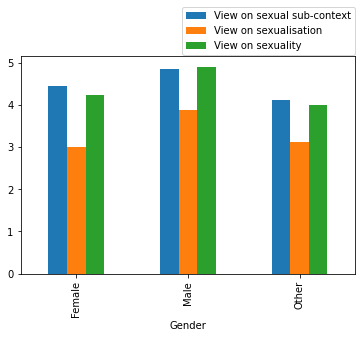

In [17]:
data.pivot_table(values = ['View_on_sexuality', 'View_on_sexualisation', 'View_on_sexual_sub_context'], index = 'Gender', aggfunc = 'mean').plot(kind = 'bar', grid = True)
plt.legend(['View on sexual sub-context','View on sexualisation','View on sexuality'], loc = 'upper right', bbox_to_anchor = (1.015,1.25))

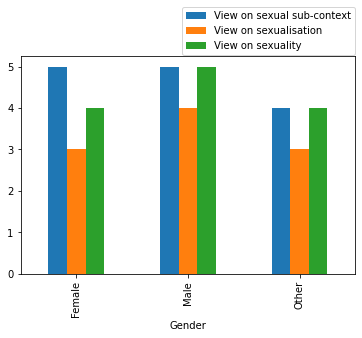

In [18]:
data.pivot_table(values = ['View_on_sexuality', 'View_on_sexualisation', 'View_on_sexual_sub_context'], index = 'Gender', aggfunc = 'median').plot(kind = 'bar', grid = True)
plt.legend(['View on sexual sub-context','View on sexualisation','View on sexuality'], loc = 'upper right', bbox_to_anchor = (1.015,1.25))

In [19]:
data.groupby('Age_group')['View_on_sexuality', 'View_on_sexualisation', 'View_on_sexual_sub_context'].agg(['mean','median','std','max','min'])

<ipython-input-19-77011a714b0e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('Age_group')['View_on_sexuality', 'View_on_sexualisation', 'View_on_sexual_sub_context'].agg(['mean','median','std','max','min'])


View_on_sexuality                           \
                                  mean median       std max min   
Age_group                                                         
16-20                         4.518519    4.0  1.484176   7   1   
21-26                         4.914894    5.0  1.283975   7   2   
27-35                         4.695652    4.5  1.443292   7   1   
More than 35                  5.142857    5.5  1.167321   7   3   
Prefer not to answer          5.333333    6.0  1.154701   6   4   
Younger than 16               4.111111    4.0  0.781736   6   3   

                     View_on_sexualisation                           \
                                      mean median       std max min   
Age_group                                                             
16-20                             3.419753    3.0  1.413013   7   1   
21-26                             3.925532    4.0  1.468225   7   1   
27-35                             3.630435    4.0  1.525468   7   1   
More than 35                      3.928571    3.5  1.774360   7   2   
Prefer not to answer              4.333333    4.0  1.527525   6   3   
Younger than 16                   3.000000    3.0  0.866025   4   2   

                     View_on_sexual_sub_context                           
                                           mean median       std max min  
Age_group                                                                 
16-20                                  4.469136      4  1.162824   7   2  
21-26                                  4.882979      5  1.162648   7   2  
27-35                                  4.869565      5  1.343440   7   1  
More than 35                           4.928571      5  1.206666   7   3  
Prefer not to answer                   4.666667      4  1.154701   6   4  
Younger than 16                        4.555556      4  0.726483   6   4

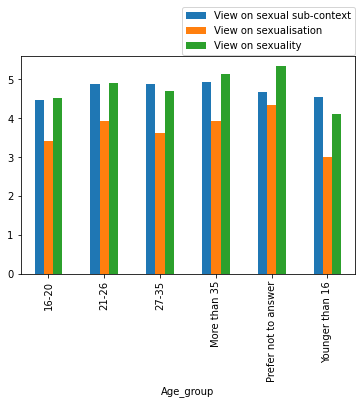

In [20]:
data.pivot_table(values = ['View_on_sexuality', 'View_on_sexualisation', 'View_on_sexual_sub_context'], index = 'Age_group', aggfunc = 'mean').plot(kind = 'bar',grid = True)
plt.legend(['View on sexual sub-context','View on sexualisation','View on sexuality'], loc = 'upper right', bbox_to_anchor = (1.015,1.25))

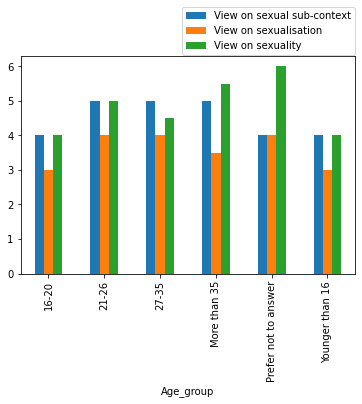

In [21]:
data.pivot_table(values = ['View_on_sexuality', 'View_on_sexualisation', 'View_on_sexual_sub_context'], index = 'Age_group', aggfunc = 'median').plot(kind = 'bar', grid = True)
plt.legend(['View on sexual sub-context','View on sexualisation','View on sexuality'], loc = 'upper right', bbox_to_anchor = (1.015,1.25))

In [22]:
data.groupby('Country')['View_on_sexuality', 'View_on_sexualisation', 'View_on_sexual_sub_context'].agg(['mean','median','std','max','min'])

<ipython-input-22-9d78310f76bf>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('Country')['View_on_sexuality', 'View_on_sexualisation', 'View_on_sexual_sub_context'].agg(['mean','median','std','max','min'])


View_on_sexuality                           \
                                       mean median       std max min   
Country                                                                
Australia and New Zealand          4.777778    5.0  1.715938   7   1   
Brazil                             4.750000    4.5  0.886405   6   4   
Canada                             5.153846    5.0  0.898717   7   4   
France                             4.750000    4.5  1.164965   6   3   
Germany                            5.200000    6.0  1.698739   7   2   
Latvia                             5.250000    5.0  1.258306   7   4   
Mexico                             4.500000    4.0  1.000000   6   4   
Other                              4.916667    5.0  1.500000   7   1   
Poland                             4.833333    5.0  1.329160   6   3   
Russia                             4.666667    4.5  0.816497   6   4   
The Netherlands                    3.666667    4.0  1.505545   6   2   
UK                                 4.500000    4.0  1.000000   6   3   
USA                                4.642857    5.0  1.432299   7   1   

                          View_on_sexualisation                           \
                                           mean median       std max min   
Country                                                                    
Australia and New Zealand              3.000000    3.0  1.500000   5   1   
Brazil                                 3.125000    3.5  1.457738   5   1   
Canada                                 4.153846    5.0  1.573010   6   2   
France                                 3.625000    3.5  1.685018   6   1   
Germany                                3.866667    4.0  1.407463   6   1   
Latvia                                 4.500000    4.0  1.000000   6   4   
Mexico                                 3.500000    3.5  1.290994   5   2   
Other                                  3.944444    4.0  1.452966   7   1   
Poland                                 3.666667    3.5  1.861899   7   2   
Russia                                 3.833333    3.5  1.722401   7   2   
The Netherlands                        3.833333    3.5  1.722401   7   2   
UK                                     3.700000    4.0  1.128576   6   2   
USA                                    3.562500    3.0  1.511406   7   1   

                          View_on_sexual_sub_context                           
                                                mean median       std max min  
Country                                                                        
Australia and New Zealand                   4.888889    5.0  1.536591   7   3  
Brazil                                      4.750000    5.0  1.035098   6   3  
Canada                                      4.846154    5.0  0.987096   7   3  
France                                      4.625000    4.5  1.302470   6   3  
Germany                                     4.933333    5.0  1.222799   6   2  
Latvia                                      4.250000    4.0  1.258306   6   3  
Mexico                                      4.500000    4.0  1.000000   6   4  
Other                                       5.166667    5.0  1.108409   7   3  
Poland                                      4.666667    4.5  1.751190   7   2  
Russia                                      4.666667    4.5  0.816497   6   4  
The Netherlands                             3.833333    3.5  1.722401   7   2  
UK                                          4.450000    4.0  0.998683   6   3  
USA                                         4.678571    5.0  1.202207   7   1

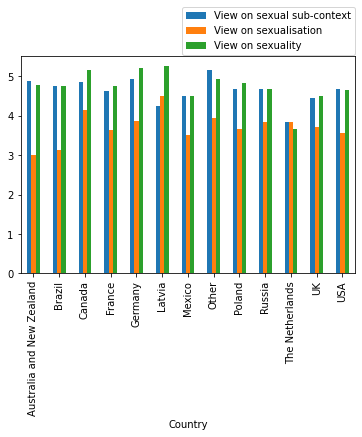

In [23]:
data.pivot_table(values = ['View_on_sexuality', 'View_on_sexualisation', 'View_on_sexual_sub_context'], index = 'Country', aggfunc = 'mean').plot(kind = 'bar', grid = True)
plt.legend(['View on sexual sub-context','View on sexualisation','View on sexuality'], loc = 'upper right', bbox_to_anchor = (1.015,1.25))

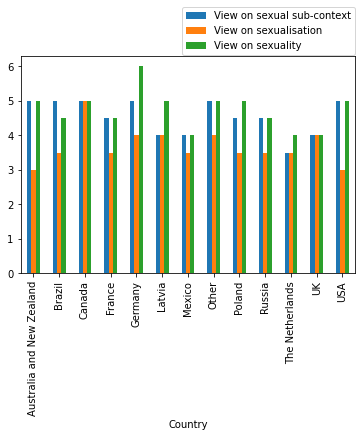

In [24]:
data.pivot_table(values = ['View_on_sexuality', 'View_on_sexualisation', 'View_on_sexual_sub_context'], index = 'Country', aggfunc = 'median').plot(kind = 'bar', grid = True)
plt.legend(['View on sexual sub-context','View on sexualisation','View on sexuality'], loc = 'upper right', bbox_to_anchor = (1.015,1.25))

In [25]:
genres_exploded.groupby('Genre')['View_on_sexuality', 'View_on_sexualisation', 'View_on_sexual_sub_context'].agg(['mean','median','std','max','min'])

<ipython-input-25-a22e87ade6d9>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  genres_exploded.groupby('Genre')['View_on_sexuality', 'View_on_sexualisation', 'View_on_sexual_sub_context'].agg(['mean','median','std','max','min'])


View_on_sexuality                           \
                               mean median       std max min   
Genre                                                          
Action                     5.097561      5  1.319183   7   1   
Adventure                  4.785714      5  1.449320   7   2   
Multiplayer RPGs           4.866667      5  1.195778   7   2   
None                       3.833333      4  0.983192   5   2   
Simulators                 4.173913      4  1.466355   7   1   
Singleplayer RPGs          4.966667      5  1.425687   7   1   
Strategy                   4.613636      4  1.279824   7   2   

                  View_on_sexualisation                           \
                                   mean median       std max min   
Genre                                                              
Action                         4.048780    4.0  1.395550   7   2   
Adventure                      4.214286    4.0  1.257780   7   2   
Multiplayer RPGs               3.700000    4.0  1.441981   6   1   
None                           3.333333    3.5  1.211060   5   2   
Simulators                     3.217391    3.0  1.126399   5   1   
Singleplayer RPGs              3.577778    3.0  1.528587   7   1   
Strategy                       3.795455    4.0  1.578630   7   1   

                  View_on_sexual_sub_context                           
                                        mean median       std max min  
Genre                                                                  
Action                              4.902439      5  1.135889   7   3  
Adventure                           4.892857      5  1.165532   7   2  
Multiplayer RPGs                    4.800000      5  1.242911   7   2  
None                                3.666667      4  0.816497   4   2  
Simulators                          4.782609      5  1.166055   7   2  
Singleplayer RPGs                   4.888889      5  1.184587   7   1  
Strategy                            4.409091      4  1.187497   7   2

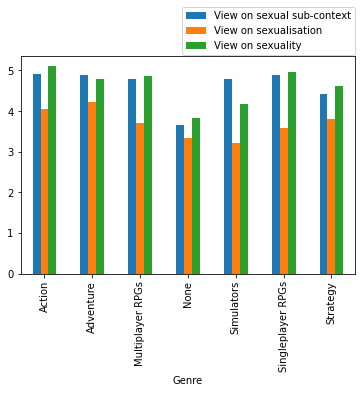

In [26]:
genres_exploded.pivot_table(values = ['View_on_sexuality', 'View_on_sexualisation', 'View_on_sexual_sub_context'], index = 'Genre', aggfunc = 'mean').plot(kind = 'bar', grid = True)
plt.legend(['View on sexual sub-context','View on sexualisation','View on sexuality'], loc = 'upper right', bbox_to_anchor = (1.015,1.25))

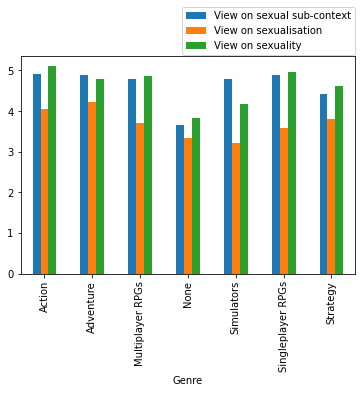

In [27]:
genres_exploded.pivot_table(values = ['View_on_sexuality', 'View_on_sexualisation', 'View_on_sexual_sub_context'], index = 'Genre', aggfunc = 'mean').plot(kind = 'bar')
plt.legend(['View on sexual sub-context','View on sexualisation','View on sexuality'], loc = 'upper right', bbox_to_anchor = (1.015,1.25))

In [28]:
data.groupby('Sexual_orientation')['View_on_sexuality', 'View_on_sexualisation', 'View_on_sexual_sub_context'].agg(['mean','median','std','max','min'])

<ipython-input-28-067c8009f61e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('Sexual_orientation')['View_on_sexuality', 'View_on_sexualisation', 'View_on_sexual_sub_context'].agg(['mean','median','std','max','min'])


View_on_sexuality                           \
                                mean median       std max min   
Sexual_orientation                                              
Asexual                     3.285714      4  0.913874   4   2   
Bisexual                    4.530612      4  1.459196   7   2   
Heterosexual                4.902597      5  1.332203   7   1   
Homosexual                  4.529412      5  0.874475   6   3   
Other                       5.307692      5  1.436698   7   3   

                   View_on_sexualisation                           \
                                    mean median       std max min   
Sexual_orientation                                                  
Asexual                         2.357143      2  0.928783   4   1   
Bisexual                        3.183673      3  1.453064   6   1   
Heterosexual                    3.928571      4  1.446687   7   1   
Homosexual                      3.058824      3  0.826936   4   1   
Other                           4.769231      5  1.363442   7   2   

                   View_on_sexual_sub_context                           
                                         mean median       std max min  
Sexual_orientation                                                      
Asexual                              3.571429      4  1.222500   6   1  
Bisexual                             4.816327      5  1.130514   7   2  
Heterosexual                         4.805195      5  1.183094   7   1  
Homosexual                           4.470588      4  0.874475   6   3  
Other                                5.153846      5  1.281025   7   3

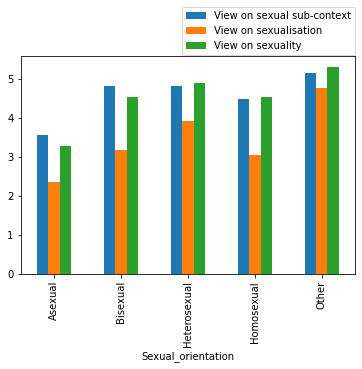

In [29]:
data.pivot_table(values = ['View_on_sexuality', 'View_on_sexualisation', 'View_on_sexual_sub_context'], index = 'Sexual_orientation', aggfunc = 'mean').plot(kind = 'bar')
plt.legend(['View on sexual sub-context','View on sexualisation','View on sexuality'], loc = 'upper right', bbox_to_anchor = (1.015,1.25))

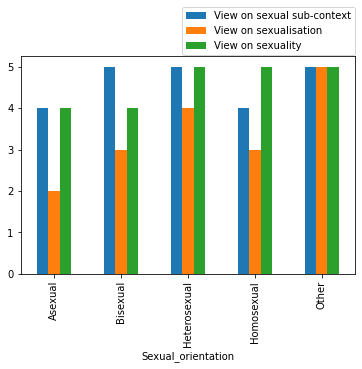

In [30]:
data.pivot_table(values = ['View_on_sexuality', 'View_on_sexualisation', 'View_on_sexual_sub_context'], index = 'Sexual_orientation', aggfunc = 'median').plot(kind = 'bar')
plt.legend(['View on sexual sub-context','View on sexualisation','View on sexuality'], loc = 'upper right', bbox_to_anchor = (1.015,1.25))